# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Jasson Franklyn Wang
- **Email:** m312b4ky2043@bangkit.academy
- **ID Dicoding:** franklynical

## Menentukan Pertanyaan Bisnis

- Berapa banyak pengguna yang menggunakan layanan selama 2 tahun?
- Pada bulan mana layanan memiliki pengguna terbanyak? Mengapa?
- Pada jam berapa puncaknya pemakaian layanan? Mengapa?
- Apakah liburan memengaruhi banyaknya pengguna?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/4ranklyn/proyek_analisis_data_dicoding/refs/heads/main/data/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/4ranklyn/proyek_analisis_data_dicoding/refs/heads/main/data/day.csv')


**Insight:**
- Data dapat diakses

### Assessing Data

In [ ]:
hour_df.info() # checking hour.csv for missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
day_df.info() # checking day.csv for missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Doubles: ", hour_df.duplicated().sum()) # looking for doubles
print("Doubles: ", day_df.duplicated().sum())

Doubles:  0
Doubles:  0


In [ ]:
hour_df.describe() # assessing for abnormal data, outlier, wrong or incorrect data type

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value dan duplicates
- Temperature (dan rata-ratanya), kelembaban, dan kecepatan angin masih dalam bentuk persentil
- Tahun perlu diubah formatnya
- Tanggal masih dalam bentuk objek

### Cleaning Data

In [ ]:
min_temp = -8 # converting temp
max_temp = 39
hour_df['temp'] = min_temp + (max_temp - min_temp) * hour_df['temp']
day_df['temp'] = min_temp + (max_temp - min_temp) * day_df['temp']

In [ ]:
min_atemp = -16 # converting atemp
max_atemp = 50
hour_df['atemp'] = min_atemp + (max_atemp - min_atemp) * hour_df['atemp']
day_df['atemp'] = min_atemp + (max_atemp - min_atemp) * day_df['atemp']

In [ ]:
hour_df['hum'] = 100 * hour_df['hum'] # converting hum and windspeed
day_df['hum'] = 100 * day_df['hum']
hour_df['windspeed'] = 67 * hour_df['windspeed']
day_df['windspeed'] = 67 * day_df['windspeed']

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday']) # converting date
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
year_mapping = {0: 2011, 1: 2012} # mapping year value

hour_df['yr'] = hour_df['yr'].map(year_mapping)
day_df['yr'] = day_df['yr'].map(year_mapping)

In [ ]:
hour_df.describe() # checking

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599


In [ ]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452


**Insight:**
- Suhu, Kelembaban, dan kecepatan angin sudah sesuai
- Format tanggal dan tahun sudah dikonversi

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
hour_df.describe(include="all") #exploring data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [ ]:
day_df.corr() #checking for correlations

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [ ]:
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


In [ ]:
monthly_dayuser_counts = day_df.groupby(['yr', 'mnth']).agg({'casual': 'sum', 'registered': 'sum', 'cnt': ['sum','mean']}).reset_index()

In [ ]:
monthly_houruser_counts = hour_df.groupby(['yr', 'mnth']).agg({'casual': 'sum', 'registered': 'sum', 'cnt': ['sum','mean']}).reset_index()

In [ ]:
pd.set_option("display.max_rows", 24, "display.max_columns", 24)
print(monthly_dayuser_counts) #checking user count
print(monthly_houruser_counts)


      yr mnth casual registered     cnt             
                 sum        sum     sum         mean
0   2011    1   3073      35116   38189  1231.903226
1   2011    2   6242      41973   48215  1721.964286
2   2011    3  12826      51219   64045  2065.967742
3   2011    4  22346      72524   94870  3162.333333
4   2011    5  31050     104771  135821  4381.322581
5   2011    6  30612     112900  143512  4783.733333
6   2011    7  36452     104889  141341  4559.387097
7   2011    8  28842     107849  136691  4409.387097
8   2011    9  26545     100873  127418  4247.266667
9   2011   10  25222      98289  123511  3984.225806
10  2011   11  15594      86573  102167  3405.566667
11  2011   12   8448      78875   87323  2816.870968
12  2012    1   8969      87775   96744  3120.774194
13  2012    2   8721      94416  103137  3556.448276
14  2012    3  31618     133257  164875  5318.548387
15  2012    4  38456     135768  174224  5807.466667
16  2012    5  44235     151630  195865  6318.

**Insight:**
- Tidak ada hubungan antara liburan dan jumlah pengguna (pertanyaan 4)
- Terdapat hubungan atas suhu dan banyaknya pengguna

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak pengguna yang menggunakan layanan selama 2 tahun?

In [ ]:
yearly_monthly_user_totals = day_df.groupby(['yr', 'mnth'])['cnt'].sum().unstack() #creating var for user usage



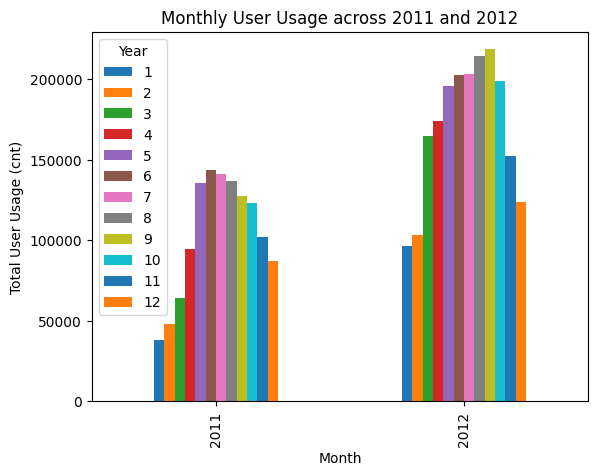

In [ ]:
yearly_monthly_user_totals.plot(kind='bar', stacked=False) # creating plot for data above

plt.title("Monthly User Usage across 2011 and 2012")
plt.xlabel("Month")
plt.ylabel("Total User Usage (cnt)")
plt.legend(title="Year")

plt.show()

In [ ]:
casual_count = day_df['casual'].sum() # dividing casual users and registered users
registered_count = day_df['registered'].sum()
total_count = day_df['cnt'].sum()

print("Casual Count:", casual_count)
print("Registered Count:", registered_count)
print("Total Count:", total_count)

Casual Count: 620017
Registered Count: 2672662
Total Count: 3292679


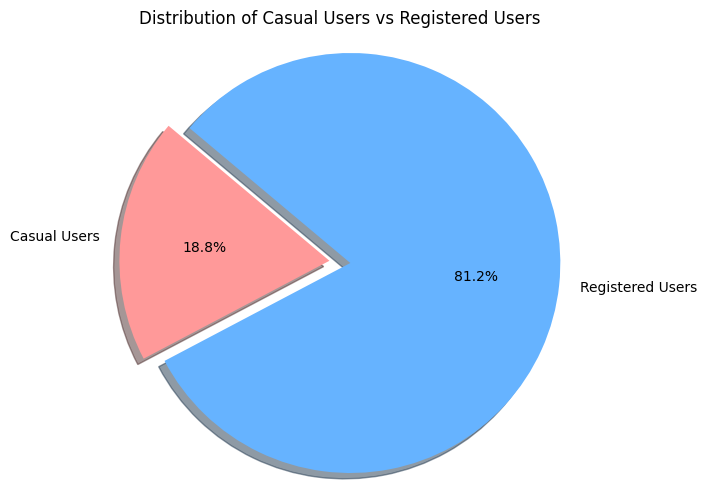

In [ ]:
labels = ['Casual Users', 'Registered Users'] #creating pie for value above
sizes = [casual_count, registered_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Casual Users vs Registered Users')
plt.show()

**Insight:**
- Terdapat total 3.292.679 pengguna yang tercatat
- Sekitar 81,2% dari total adalah pengguna terdaftar
- Terdapat pola pada bar chart yang menunjukkan peningkatan jumlah pengguna di tengah tahun, lalu menurun lagi pada akhir

### Pertanyaan 2: Pada bulan mana layanan memiliki pengguna terbanyak? Mengapa?

Dari data pada pertanyaan 1, kita dapat menyimpulkan layanan paling banyak digunakan pada bulan September tahun 2024. Untuk penyebabnya, saya akan mencari dari perubahan kelembaban, suhu, cuaca, serta kecepatan angin (walau korelasinya hampir tidak ada).

In [ ]:
# Group by year and month, then calculate the mean for temp, atemp, hum, and windspeed
monthly_changes = day_df.groupby(['yr', 'mnth'])[['temp', 'atemp', 'hum', 'windspeed']].mean()

# Separate data for 2011 and 2012
monthly_changes_2011 = monthly_changes.loc[2011]
monthly_changes_2012 = monthly_changes.loc[2012]

print("Monthly changes in 2011:\n", monthly_changes_2011)
print("\nMonthly changes in 2012:\n", monthly_changes_2012)


Monthly changes in 2011:
            temp      atemp        hum  windspeed
mnth                                            
1      1.292214  -2.503688  58.436635  13.093060
2      5.279383   2.771218  56.009311  15.314059
3      7.588329   5.469745  56.941384  15.571321
4     14.145856  14.147143  66.828740  16.362499
5     19.129868  20.353698  71.336019  12.145379
6     24.574917  26.672923  59.324997  11.939090
7     27.653040  30.903571  58.966397  11.501716
8     25.152020  27.257401  62.683113  12.778276
9     20.805669  21.523972  78.405377  10.250290
10    14.088849  14.279231  70.679468  11.770932
11    10.909892  10.355287  67.530970  12.123370
12     7.283565   5.771961  64.918300  11.258681

Monthly changes in 2012:
            temp      atemp        hum  windspeed
mnth                                            
1      4.933515   2.156747  58.729019  14.551511
2      6.820858   4.758445  57.458207  13.617355
3     13.122314  12.948143  60.753623  14.270404
4     14.034034 

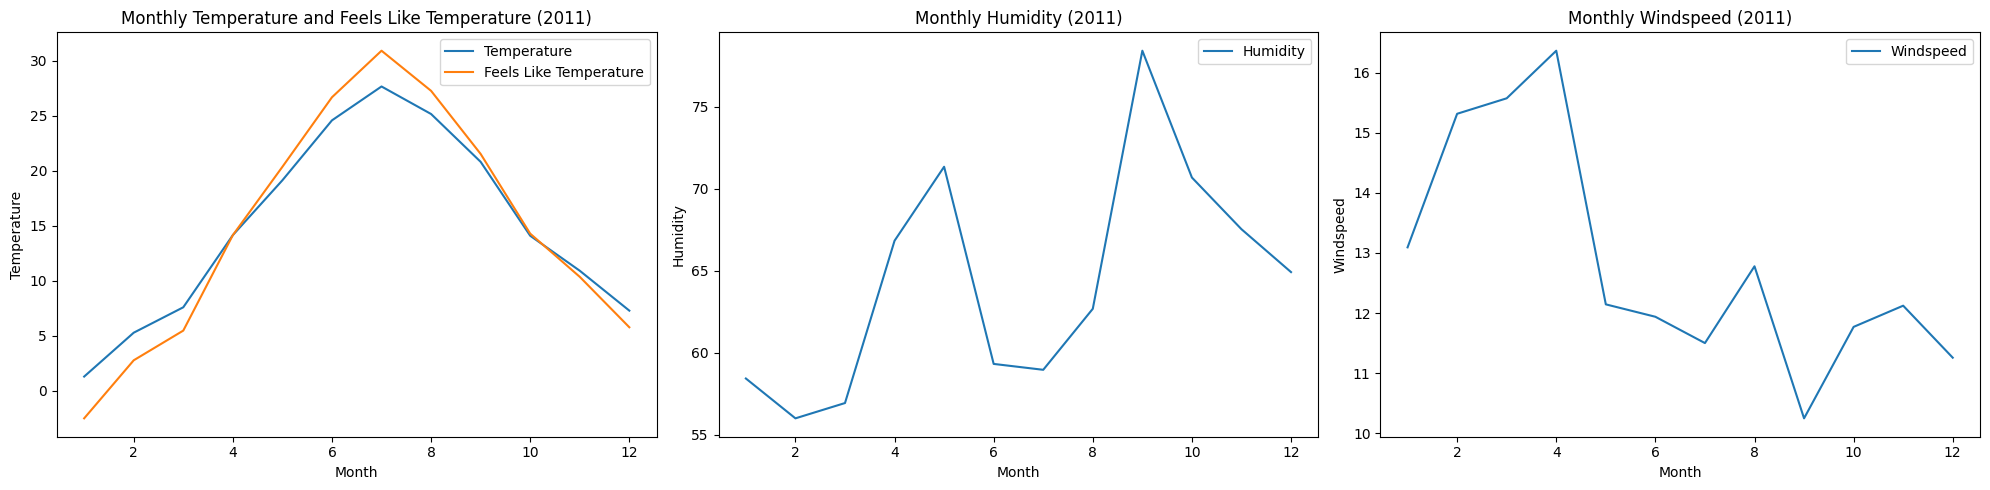

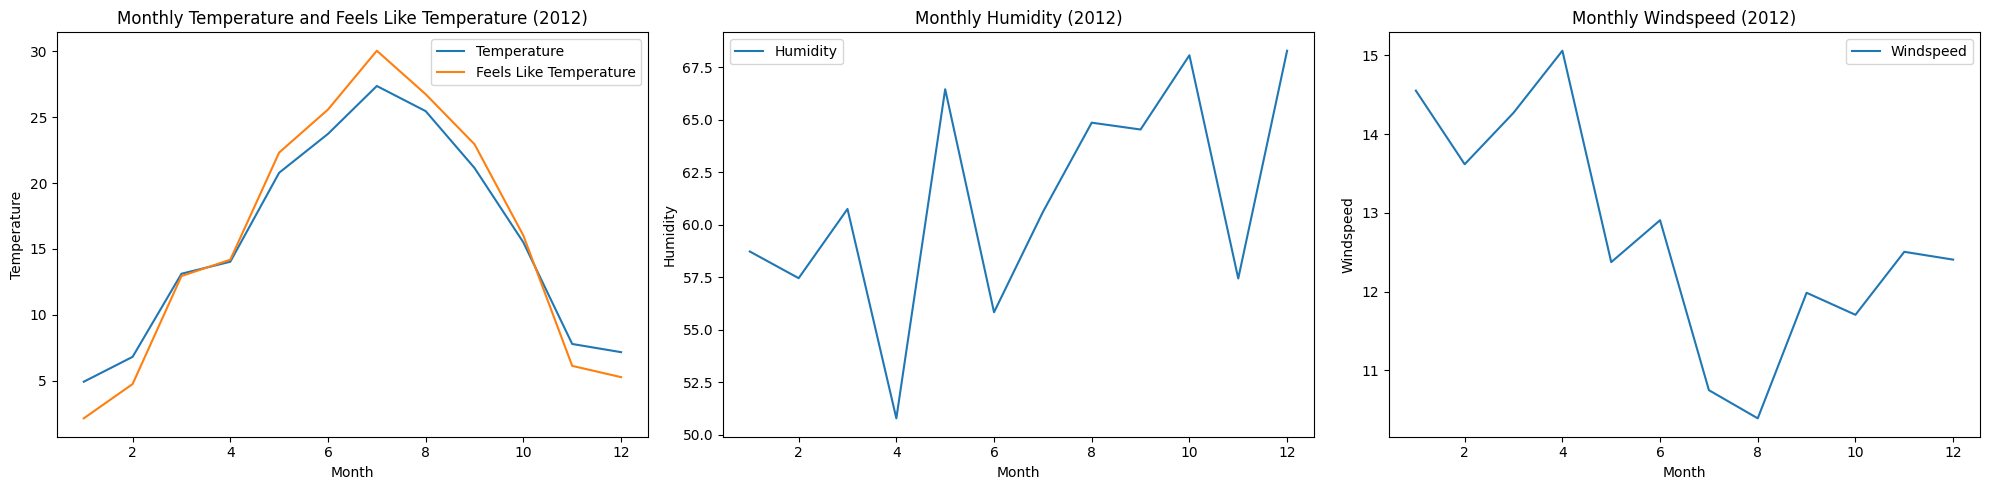

In [ ]:
plt.figure(figsize=(20, 5))  # Adjust figure size for better readability

# First chart: temp and atemp
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.plot(monthly_changes_2011.index, monthly_changes_2011['temp'], label='Temperature')
plt.plot(monthly_changes_2011.index, monthly_changes_2011['atemp'], label='Feels Like Temperature')
plt.title('Monthly Temperature and Feels Like Temperature (2011)')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()

# Second chart: hum
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.plot(monthly_changes_2011.index, monthly_changes_2011['hum'], label='Humidity')
plt.title('Monthly Humidity (2011)')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.legend()

# Third chart: windspeed
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.plot(monthly_changes_2011.index, monthly_changes_2011['windspeed'], label='Windspeed')
plt.title('Monthly Windspeed (2011)')
plt.xlabel('Month')
plt.ylabel('Windspeed')
plt.legend()

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


plt.figure(figsize=(20, 5))  # Adjust figure size for better readability

# First chart: temp and atemp
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.plot(monthly_changes_2012.index, monthly_changes_2012['temp'], label='Temperature')
plt.plot(monthly_changes_2012.index, monthly_changes_2012['atemp'], label='Feels Like Temperature')
plt.title('Monthly Temperature and Feels Like Temperature (2012)')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()

# Second chart: hum
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.plot(monthly_changes_2012.index, monthly_changes_2012['hum'], label='Humidity')
plt.title('Monthly Humidity (2012)')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.legend()

# Third chart: windspeed
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.plot(monthly_changes_2012.index, monthly_changes_2012['windspeed'], label='Windspeed')
plt.title('Monthly Windspeed (2012)')
plt.xlabel('Month')
plt.ylabel('Windspeed')
plt.legend()

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


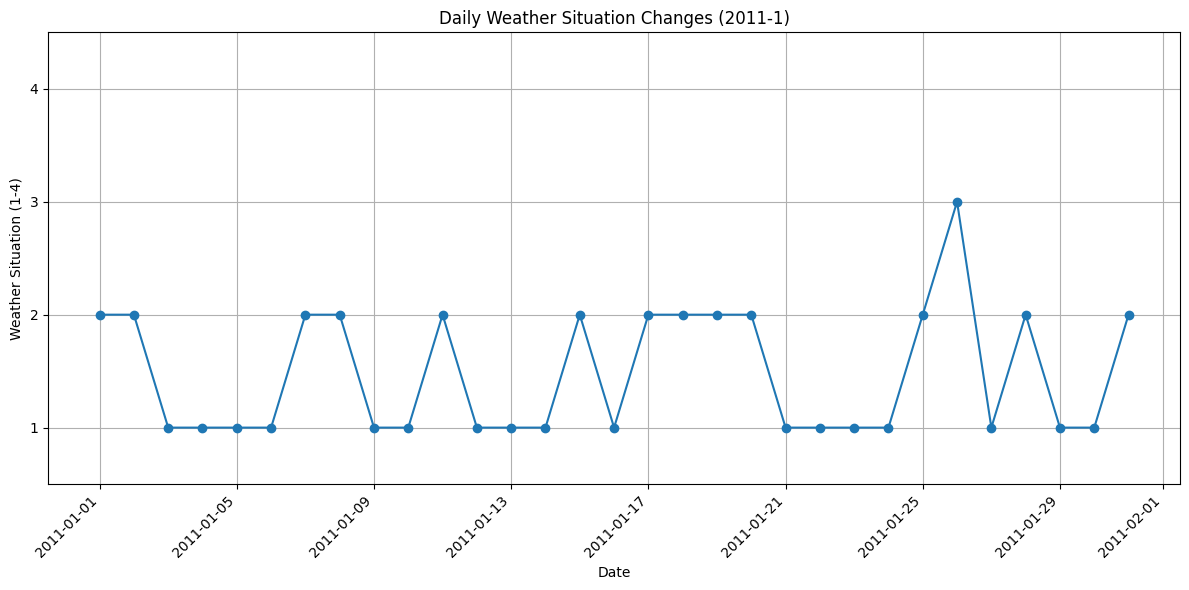

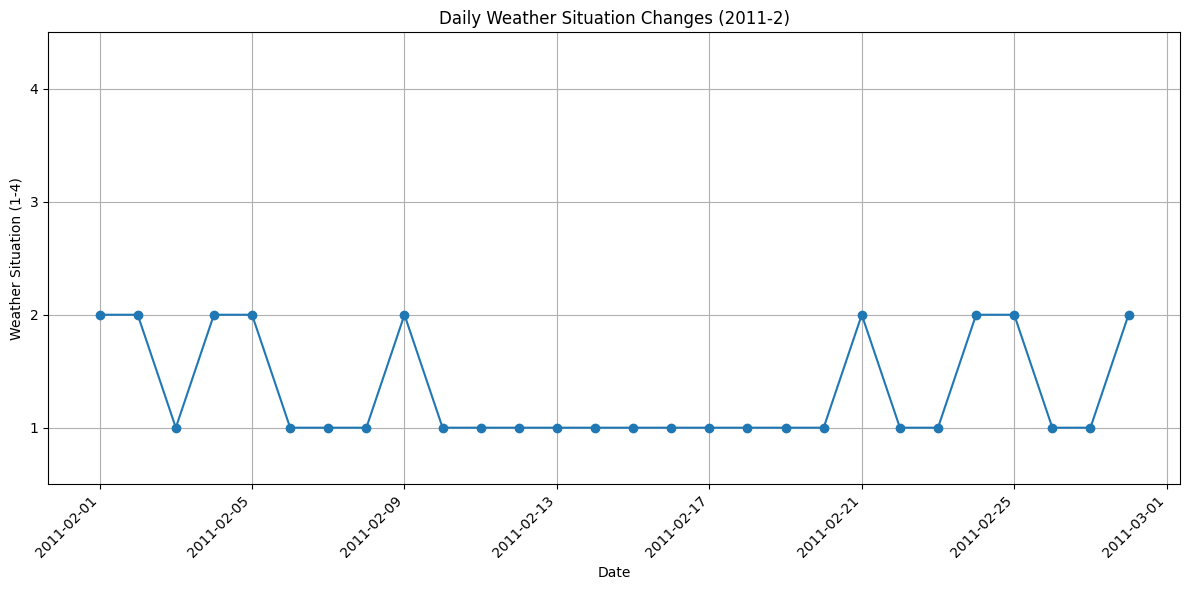

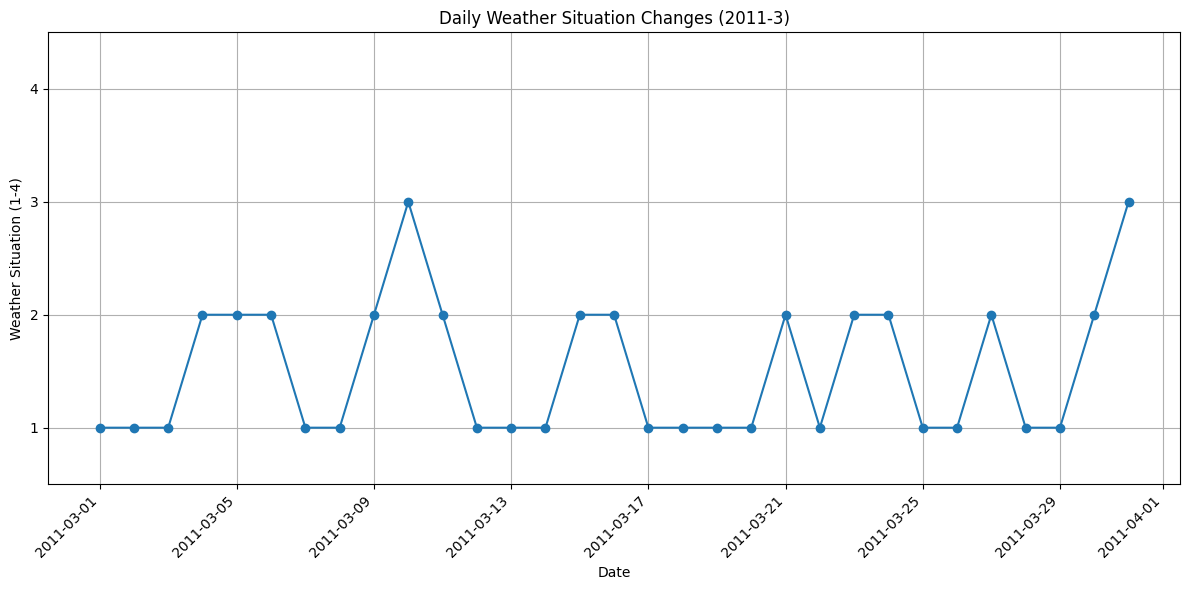

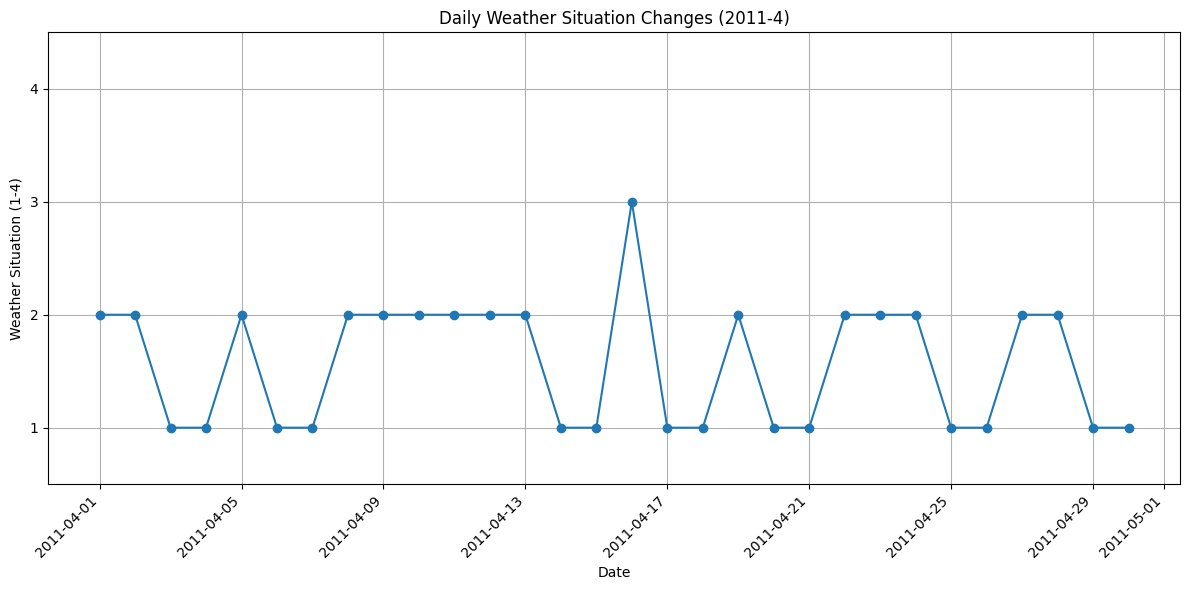

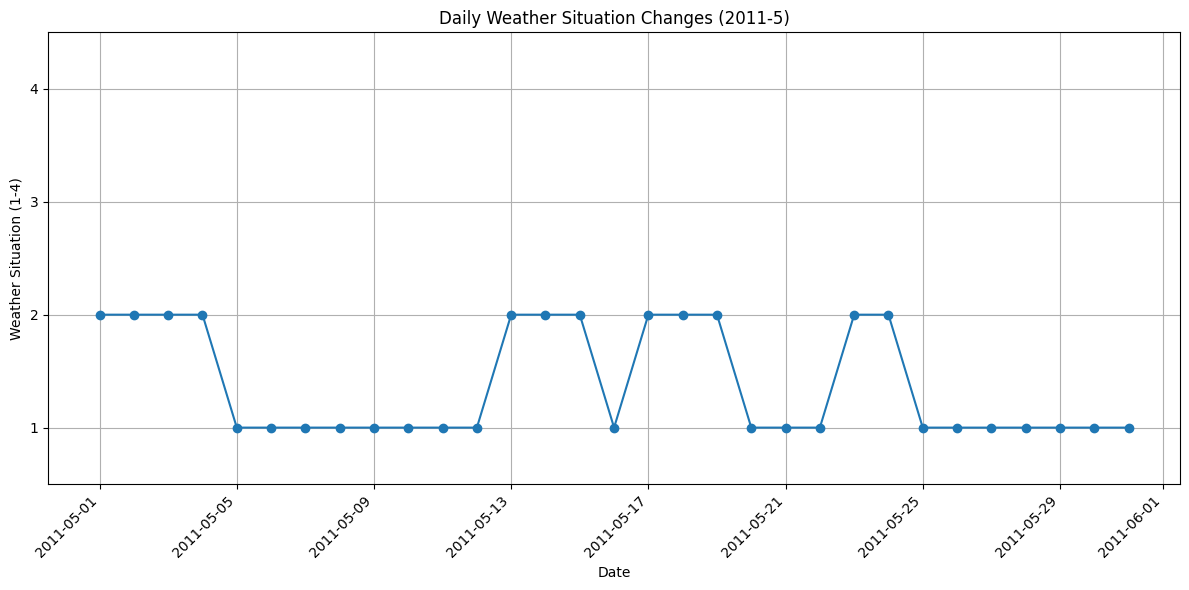

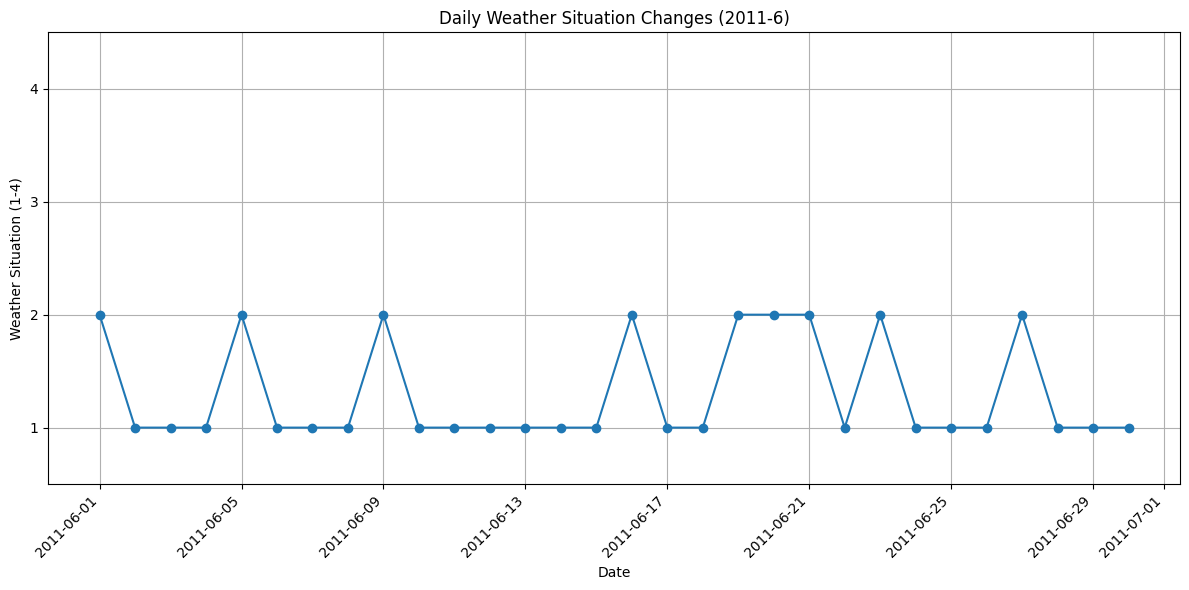

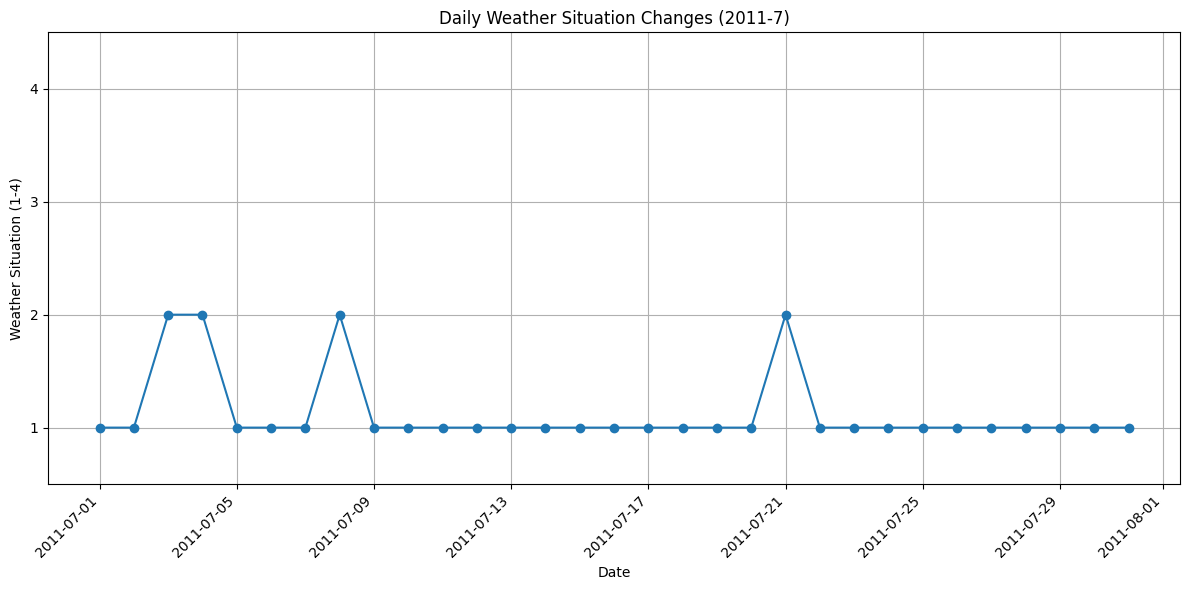

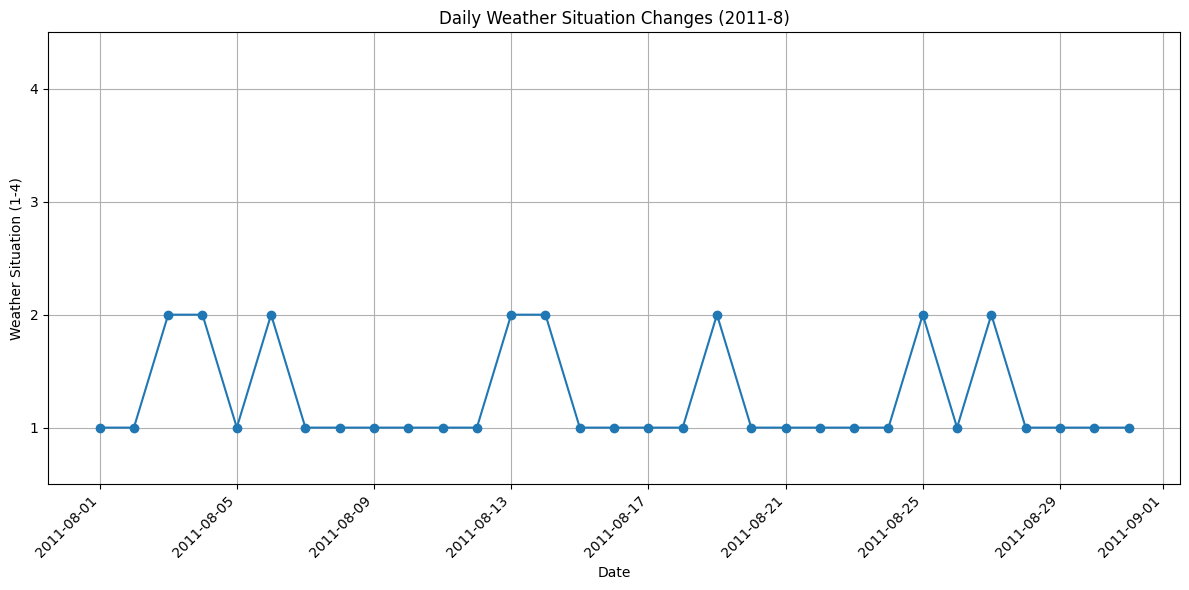

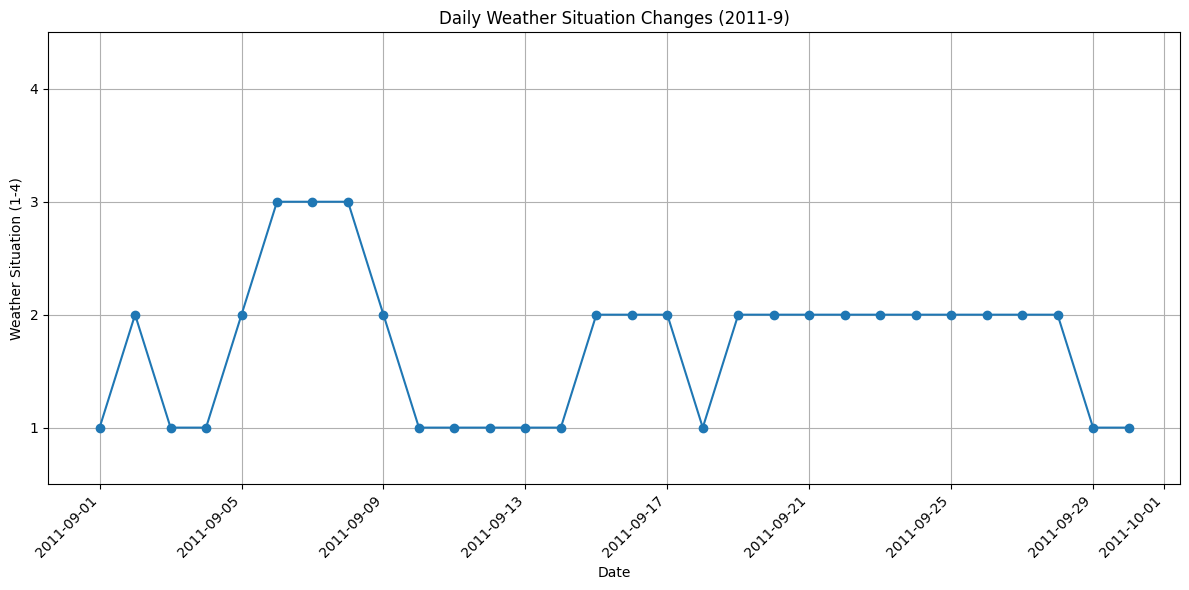

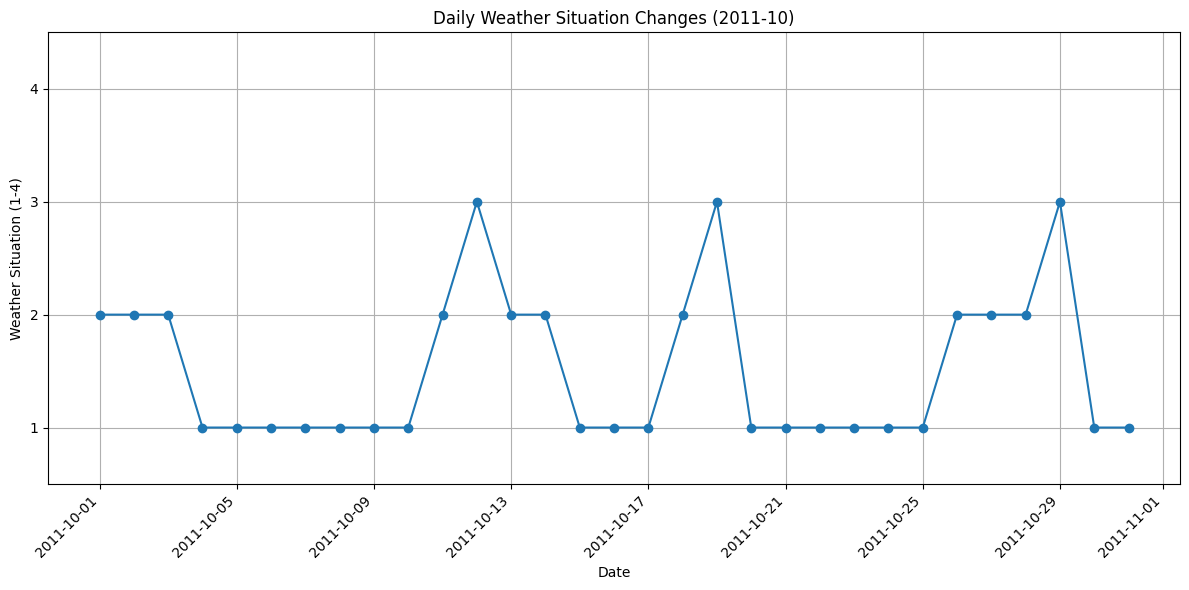

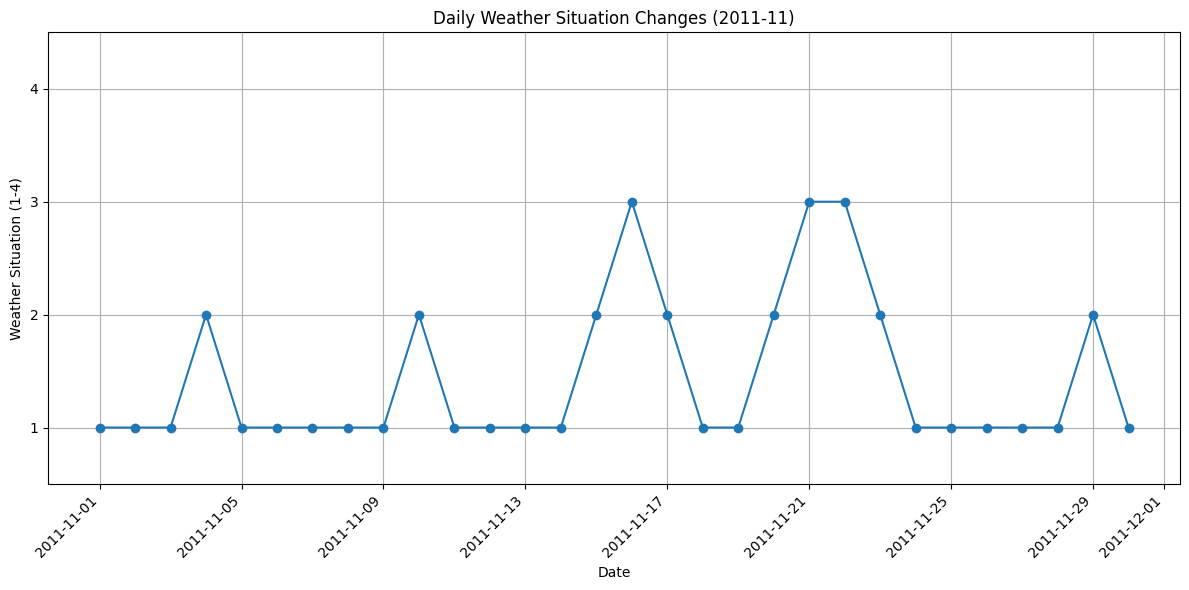

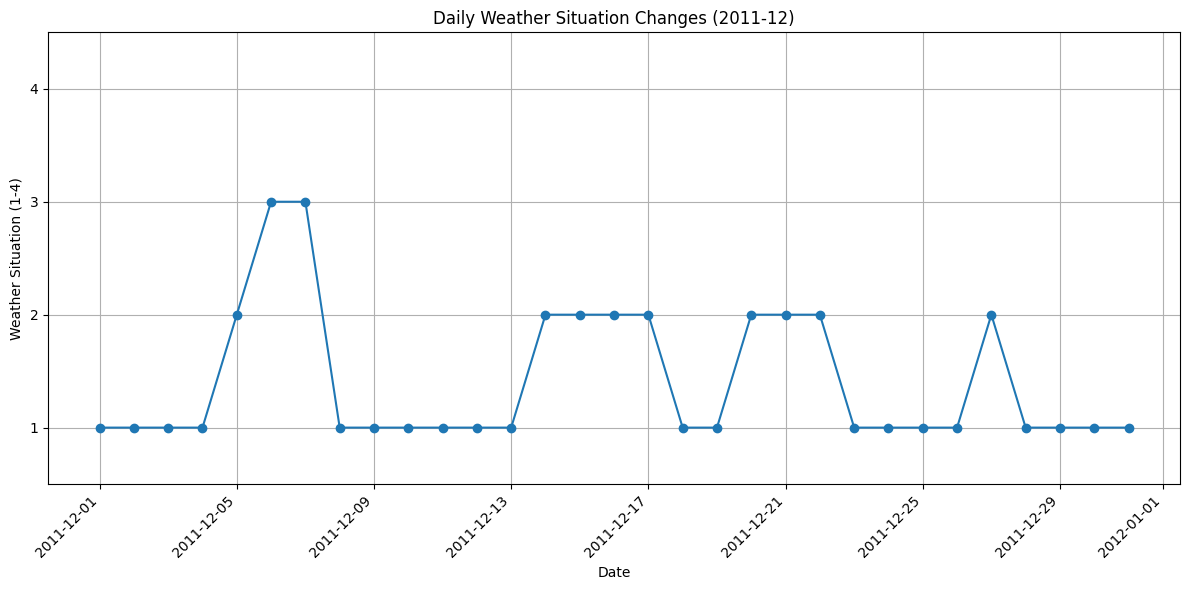

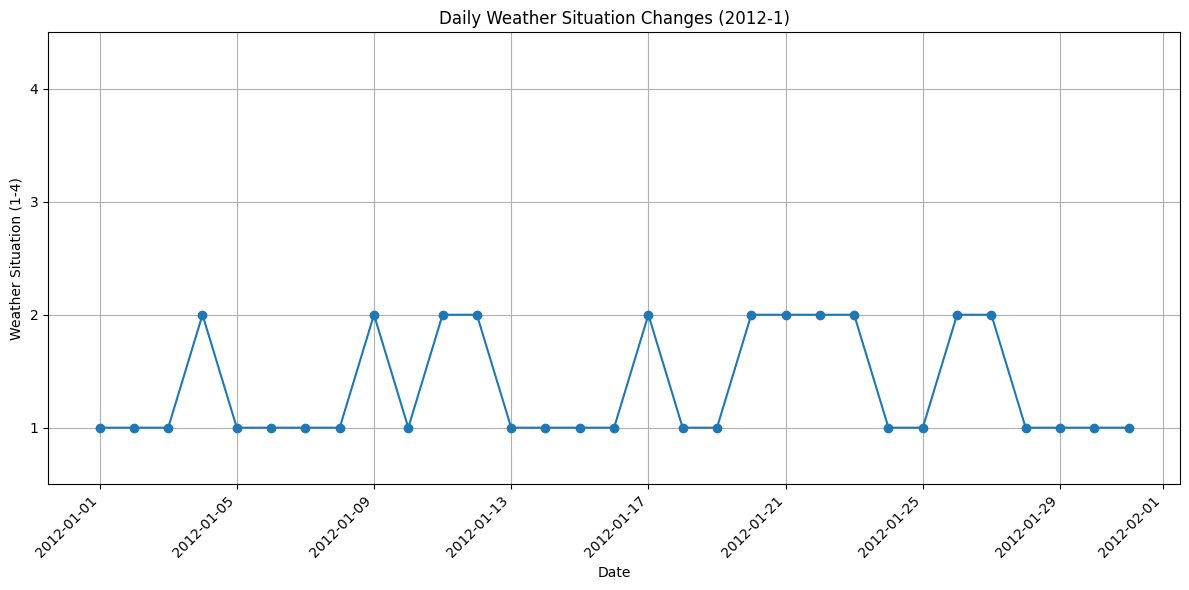

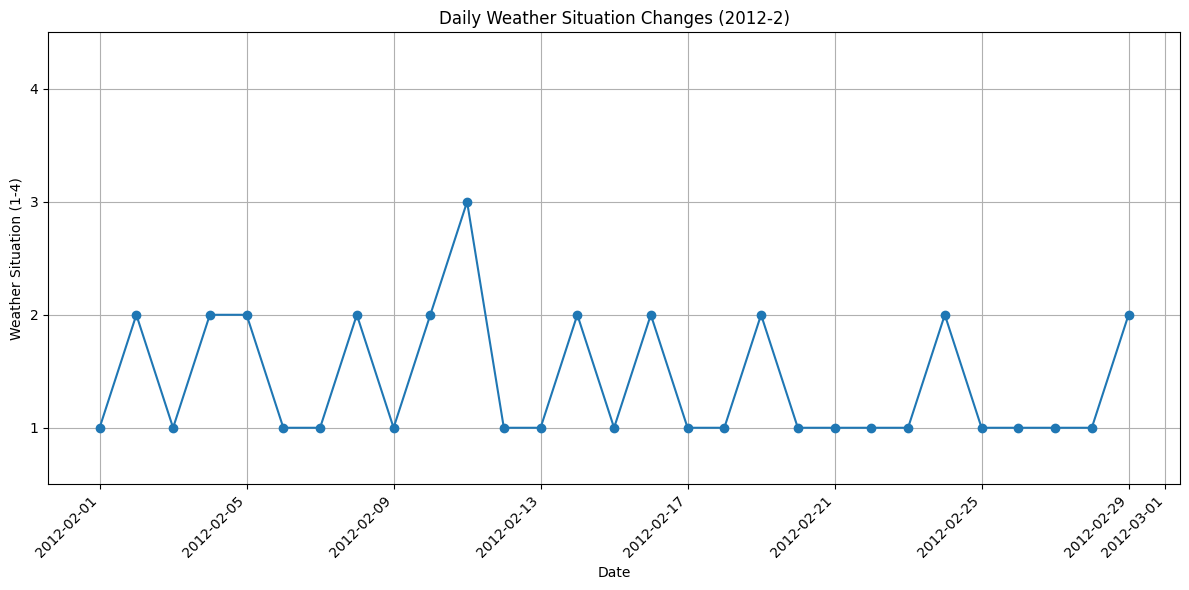

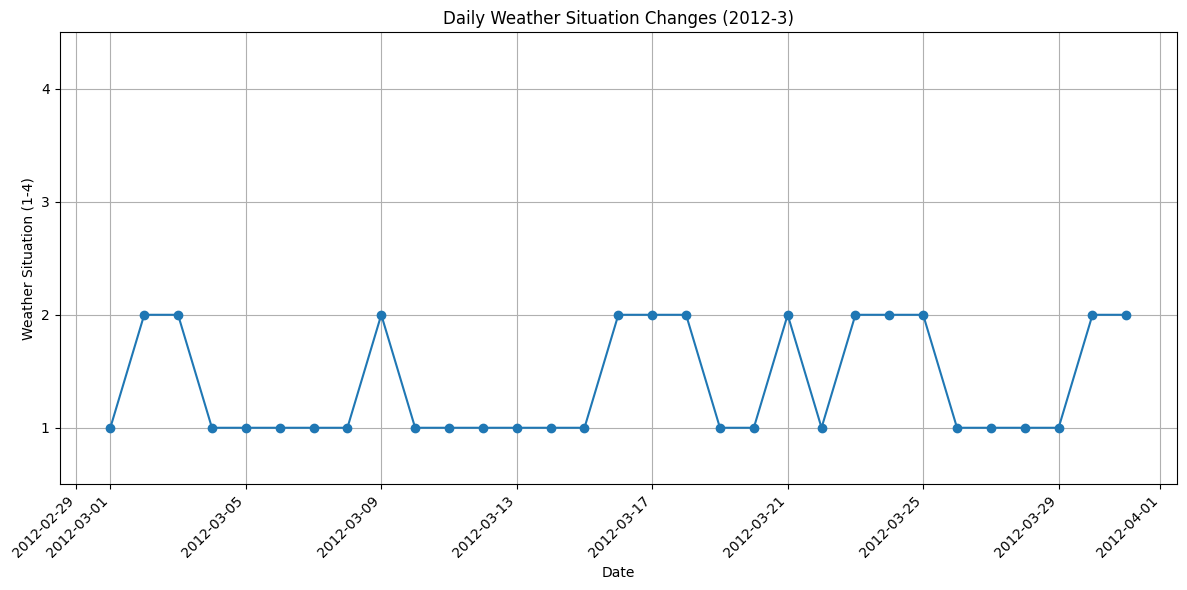

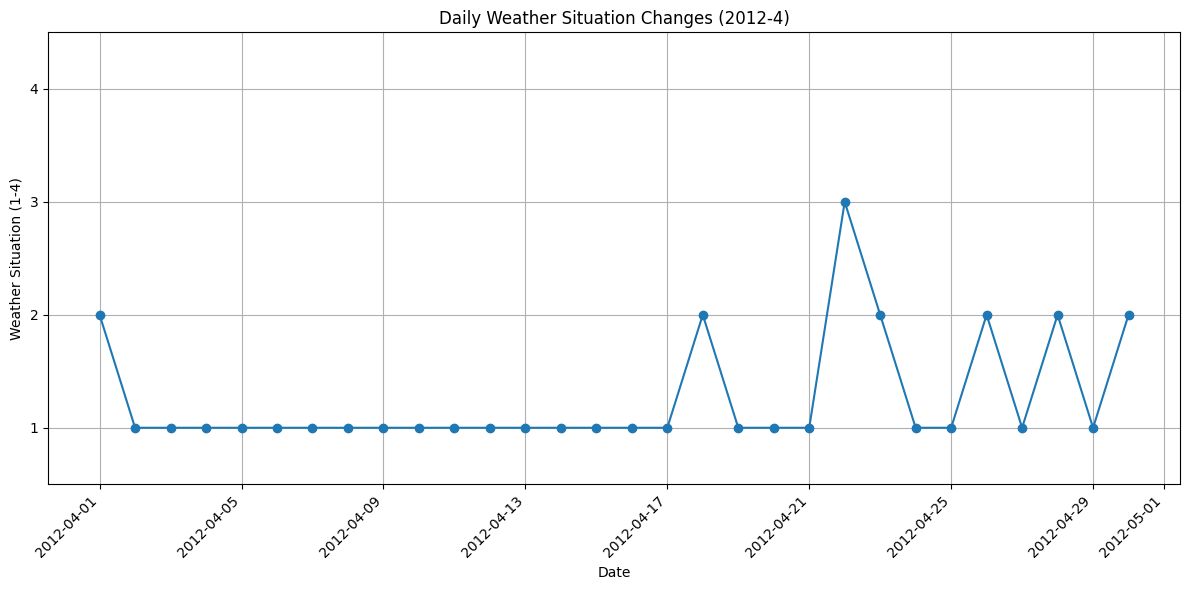

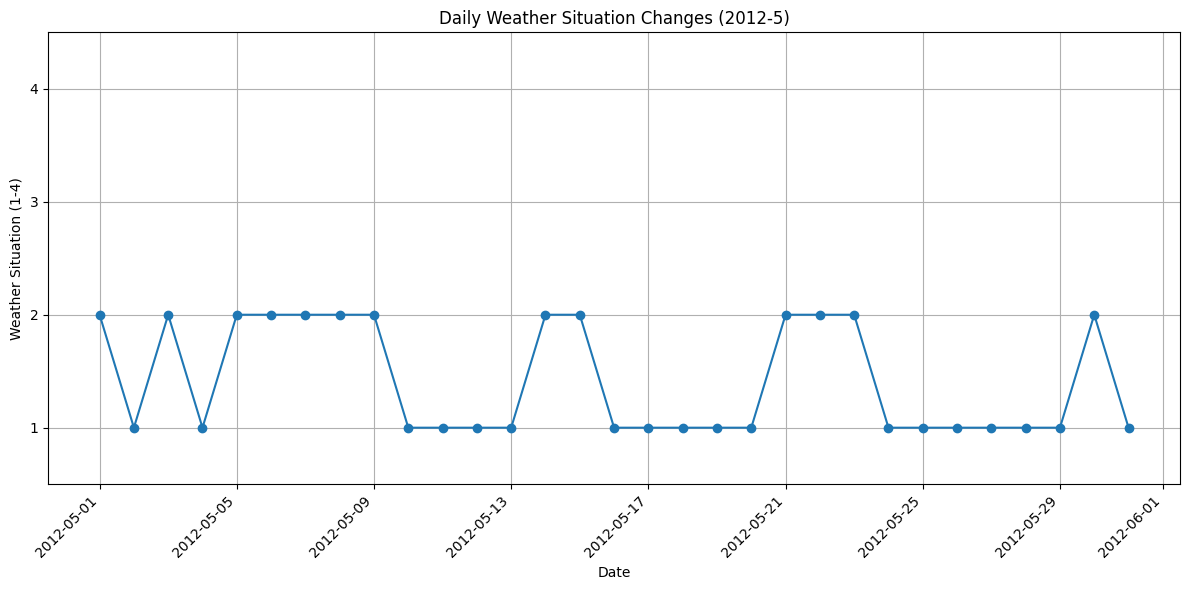

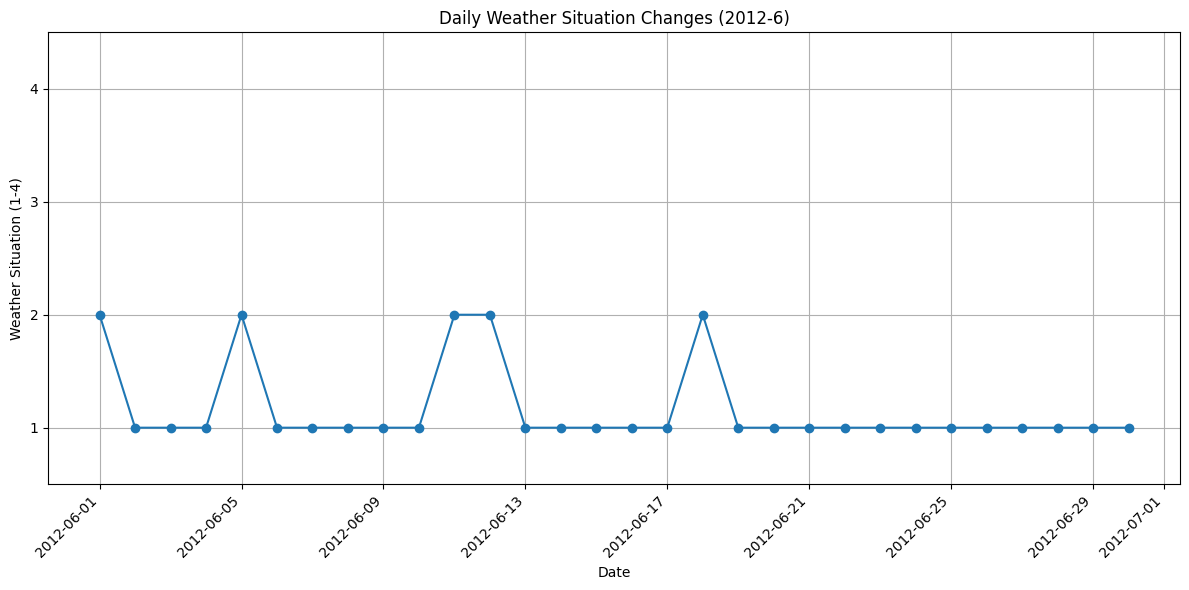

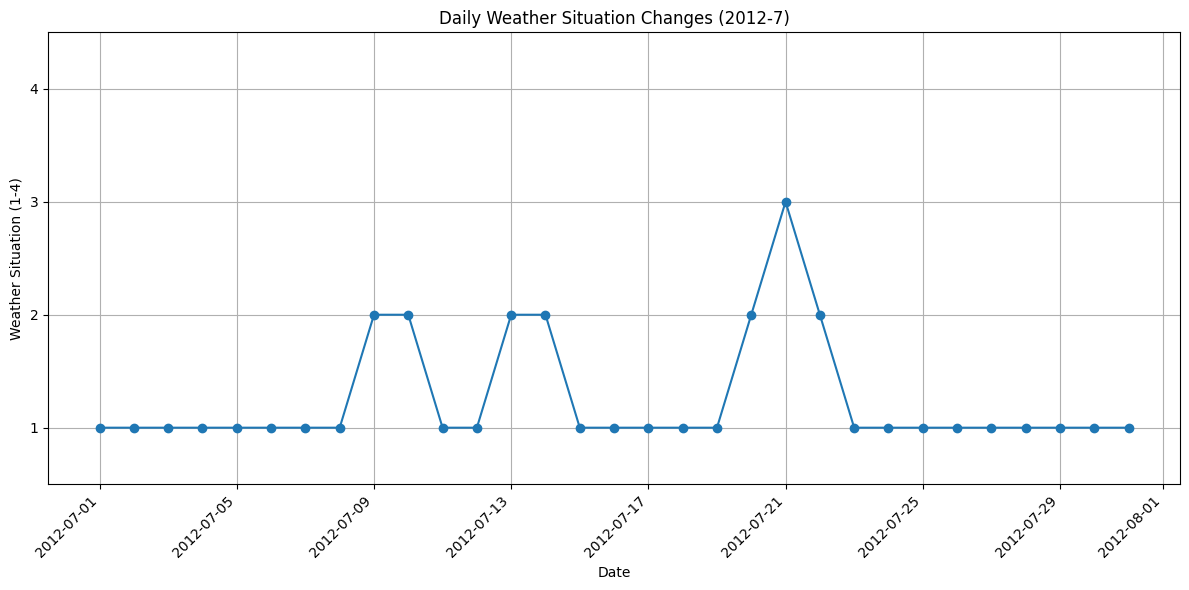

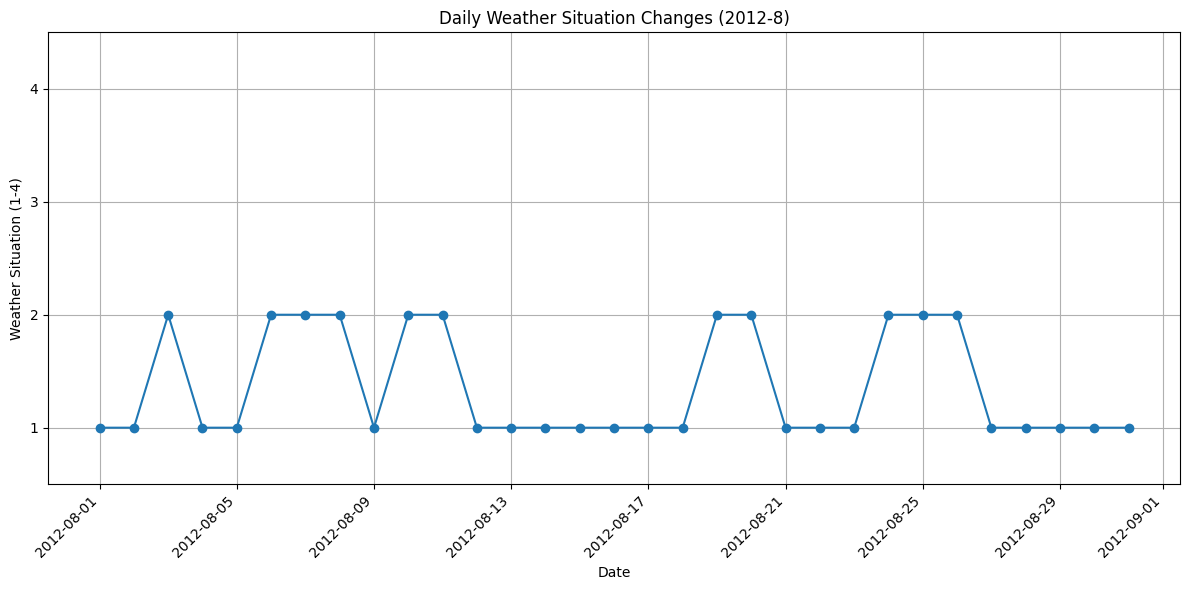

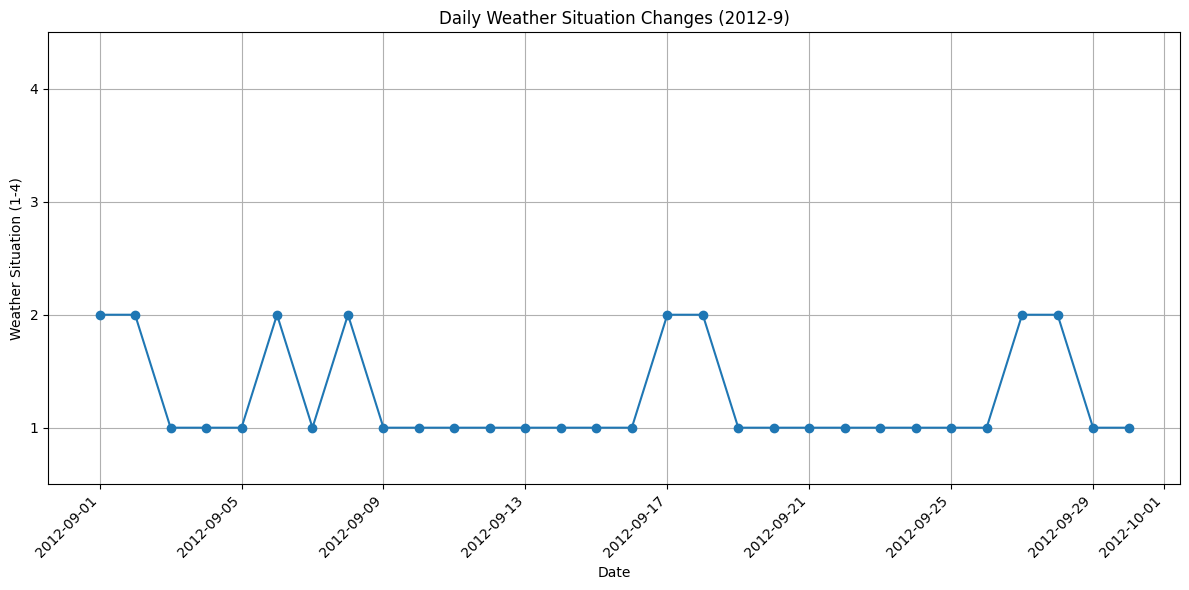

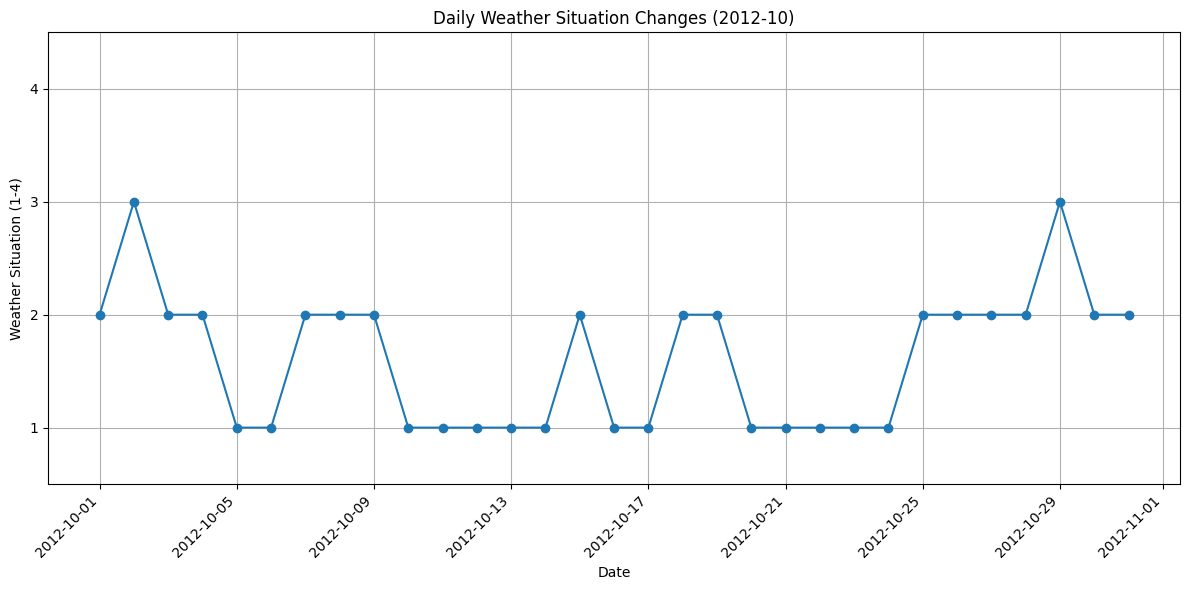

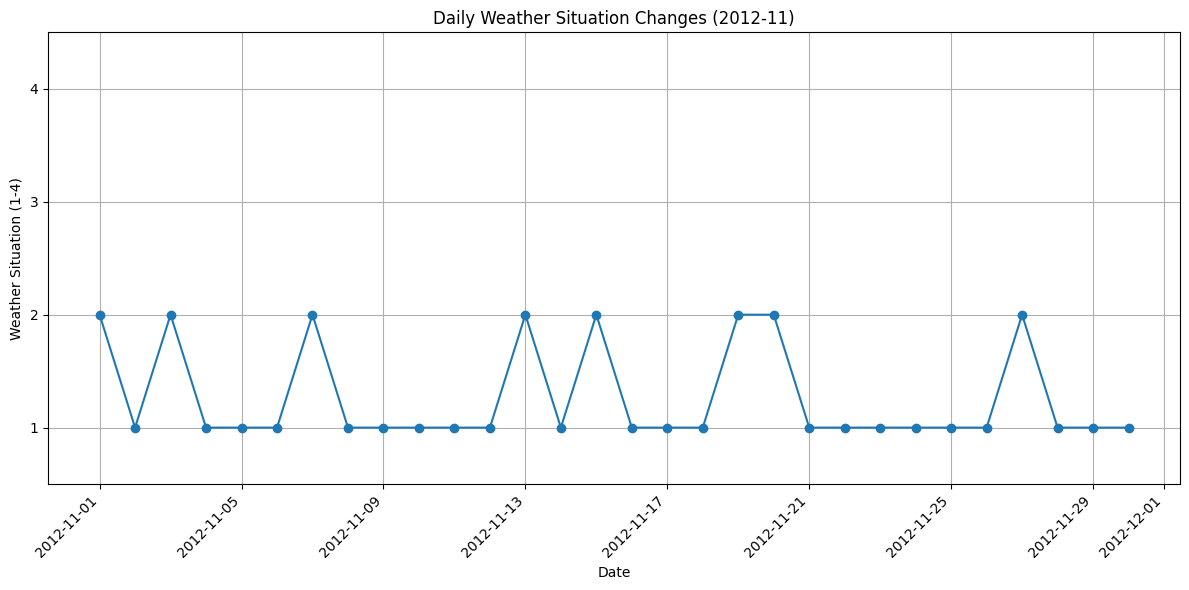

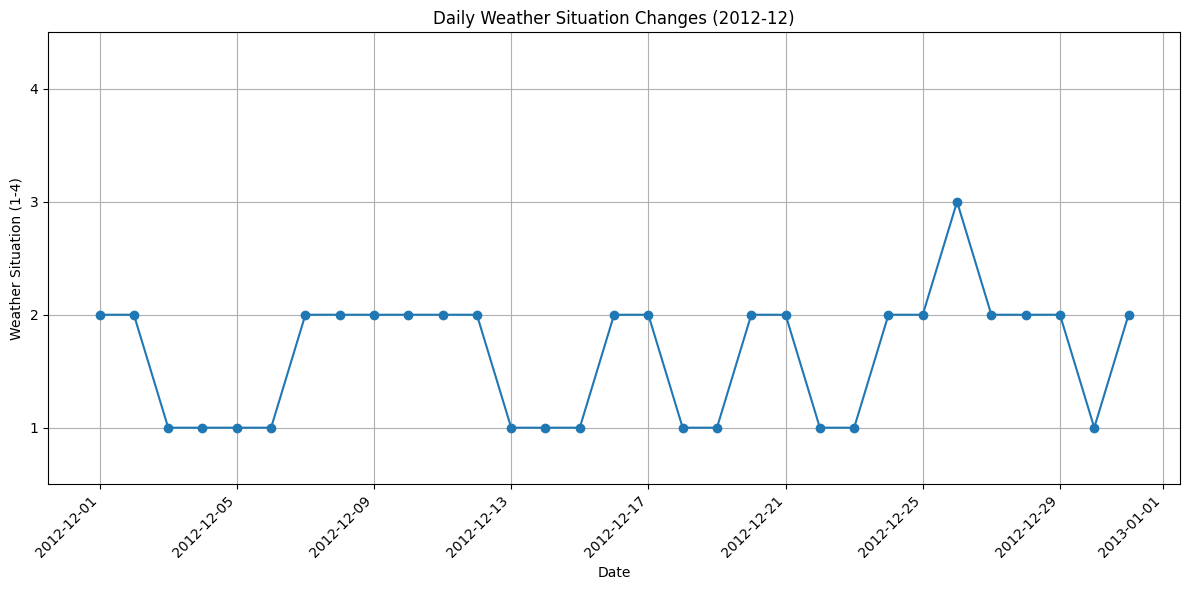

In [ ]:
# Group daily changes of weathersit across each 24 month
for year in [2011, 2012]:
  for month in range(1, 13):
    monthly_data = day_df[(day_df['yr'] == year) & (day_df['mnth'] == month)]
    if not monthly_data.empty:
      plt.figure(figsize=(12, 6))
      plt.plot(monthly_data['dteday'], monthly_data['weathersit'], marker='o')
      plt.title(f"Daily Weather Situation Changes ({year}-{month})")
      plt.xlabel("Date")
      plt.ylabel("Weather Situation (1-4)")
      plt.yticks(range(1, 5))
      plt.ylim(0.5, 4.5)  # Add some deviation for better readability
      plt.grid(True)
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()


**Insight:**
- Para pengguna paling banyak menggunakan layanan pada September 2012.
- Terdapat pola kenaikan pengguna pada saat musim panas, hingga awal musim gugur.
- Situasi yang mendukung adalah cuaca cerah atau sedikit berawan, suhu sekitar 20° C, dan kecepatan angin rendah.

### Pertanyaan 3: Pada jam berapa puncaknya pemakaian layanan? Mengapa?

Dari data pada pertanyaan 1, kita dapat menyimpulkan layanan paling banyak digunakan pada bulan September tahun 2024. Untuk penyebabnya, saya akan mencari dari perubahan kelembaban, suhu, cuaca, serta kecepatan angin (walau korelasinya hampir tidak ada).

In [ ]:
average_user_per_hour = hour_df.groupby('hr')['cnt'].mean() # creating var for avg user per
print(average_user_per_hour)


hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


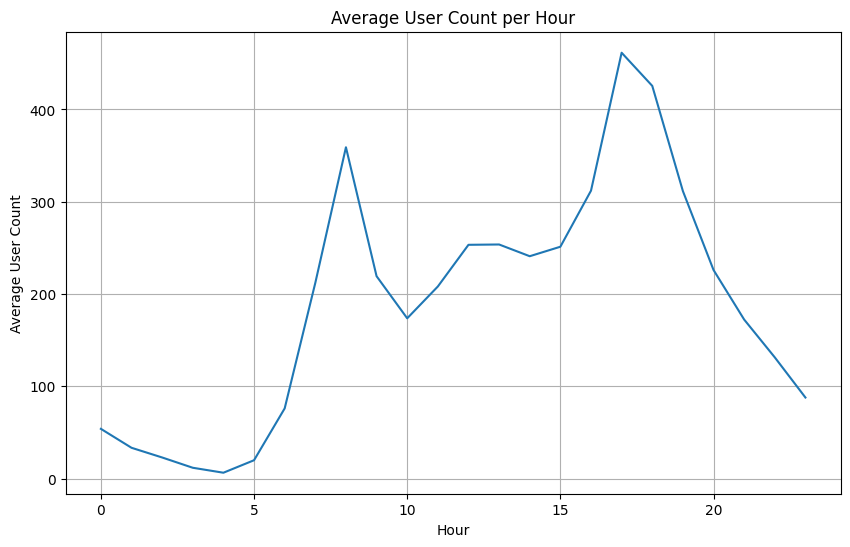

In [ ]:

plt.figure(figsize=(10, 6)) # printing the plot
plt.plot(average_user_per_hour.index, average_user_per_hour.values)
plt.title('Average User Count per Hour')
plt.xlabel('Hour')
plt.ylabel('Average User Count')
plt.grid(True)
plt.show()


In [ ]:
# creating var for average hourly conditions
average_hourly_conditions = hour_df.groupby('hr')[['hum', 'temp', 'atemp', 'windspeed']].mean()
print(average_hourly_conditions)


          hum       temp      atemp  windspeed
hr                                            
0   69.101928  13.968292  13.772909  10.837813
1   70.421271  13.590138  13.257080  10.630161
2   71.682517  13.364951  12.986175  10.352793
3   72.978479  13.296327  12.934125  10.112251
4   74.236729  12.991535  12.548267  10.439456
5   74.292887  12.497768  11.927601  10.072941
6   74.417931  12.326041  11.678789  10.567369
7   73.090784  12.637331  12.086731  10.982360
8   70.268226  13.384677  13.057939  11.829702
9   66.169188  14.406135  14.275180  12.814575
10  61.606602  15.527153  15.557142  13.536737
11  57.143054  16.562834  16.833493  13.891717
12  53.670330  17.392912  17.851627  14.472856
13  51.159122  18.072428  18.682946  14.849406
14  49.698217  18.558546  19.256403  15.574982
15  49.212620  18.724883  19.415455  15.754577
16  49.579452  18.553068  19.142333  15.900238
17  51.343836  18.065041  18.532800  15.635863
18  53.598901  17.435522  17.840584  15.053796
19  57.244505

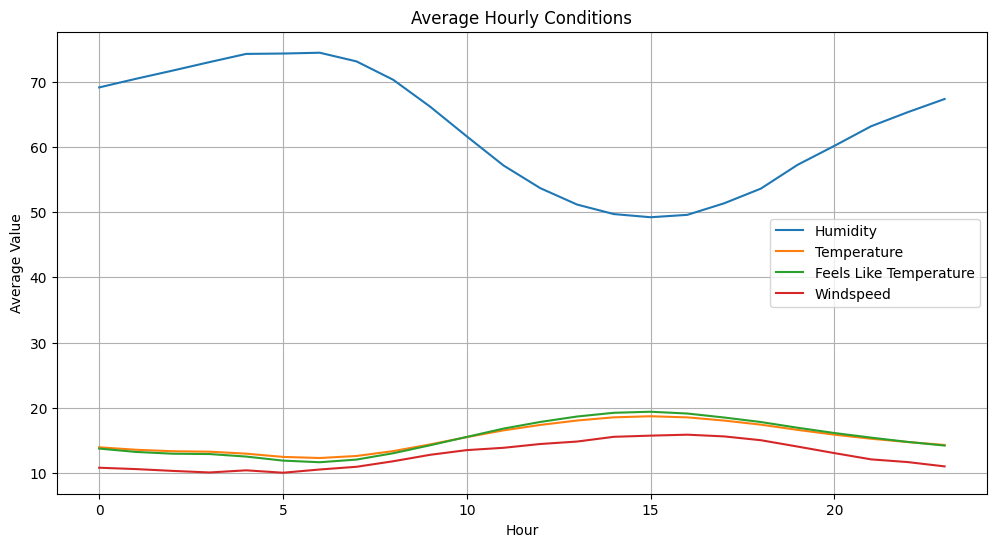

In [ ]:
plt.figure(figsize=(12, 6)) #creating the plot

plt.plot(average_hourly_conditions.index, average_hourly_conditions['hum'], label='Humidity')
plt.plot(average_hourly_conditions.index, average_hourly_conditions['temp'], label='Temperature')
plt.plot(average_hourly_conditions.index, average_hourly_conditions['atemp'], label='Feels Like Temperature')
plt.plot(average_hourly_conditions.index, average_hourly_conditions['windspeed'], label='Windspeed')


plt.title('Average Hourly Conditions')
plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.grid(True)
plt.legend()
plt.show()


**Insight:**
- Para pengguna mungkin akan menggunakan sepeda sebagai moda transportasi menuju kantor atau sekolah. Maka dari itu, data pengguna mulai meningkat pada jam 8 pagi. Begitu pula pada sekitar jam 5 sore.
- Suhu yang tidak terlalu dingin dan panas juga dapat menjadi penyebab banyaknya pengguna.
- Kelembaban serta kecepatan angin dapat berpengaruh. Semakin tinggi dalam data per jam dapat meningkatkan banyak pengguna.
- Sebaliknya, kelembaban rendah menjadi kenyamanan para pengguna sepeda.

## Conclusion

- Terdapat sekitar 3.3 juta, dan sekitar 4 dari 5 pengguna merupakan pengguna terdaftar.
- Bulan September tahun 2012 merupakan bulan dengan pengguna terbanyak. Namun bila dibandingkan dari 12 bulan untuk tiap tahunnya, pengguna mulai meningkat dan memuncak saat musim panas dan awal musim gugur sebelum turun kembali. Hal ini dikarenakan suhu dan cuaca yang bersahabat bagi pengguna.
- Pada jam 8 pagi dan jam 5 sore merupakan jam terpadat untuk penggunaan layanan. Hal ini mungkin dikarenakan jam tersebut merupakan jam para pengguna pergi ke tempat kerja atau sekolah, serta pulangnya mereka. Kecepatan angin, suhu, serta kelembaban juga dapat menjadi penyebab mereka memilih jam sore untuk bersepeda.